### **MNIST MLP with Keras**

This is a template of an MNIST classifier with an Artificial Neural Network (MLP)
If follows the basic blocks of a Deep Learning classifier

This version is prepared to run in colab or locally (to run it locally start in the imports cell)

<a target="_blank" href="https://colab.research.google.com/github/castorgit/DL-course/blob/main/00_MNIST_MLP_Keras.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

#### **Identifying GPU to use**

In [2]:
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()
gpu_devices = [device for device in devices if device.device_type == 'GPU']
for gpu in gpu_devices:
    print('Using', gpu.physical_device_desc)

Using device: 0, name: NVIDIA T600 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 7.5


In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.layers import ReLU, Dense, Softmax
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import sys
sys.stderr = open('err.txt', 'w')



Using device: 0, name: NVIDIA T600 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 7.5


I0000 00:00:1738568959.997833    1974 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1738568960.138580    1974 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1738568960.138622    1974 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1738568960.813646    1974 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1738568960.813702    1974 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [3]:
# Hyperparameters

num_classes = 10  # this is the number of digits
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### **Reading MNIST Dataset**
Most frameworks offer an easy way to download the MNIST dataset. In this case we use the datasets method

This is the way that Keras reads the dataset



In [4]:
# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
type(x_train)
# The loaded data are numpy arrays

numpy.ndarray

In [6]:
# Data Preprocessing
# Preprocess the data (flattening and normalization)
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#### **ANN architecture definition**
This is the key part of the notebook, in this cell we define the structure of the network 
and all the different elements mainly

- Activation function 
- Layer size
- Number of layers

In this example you have a simple model with a hidden layer of 10 neurons. How good will it be?

In [7]:
# MLP Model 1 hidden layer input size 784, output layer 10 (num of classes)
# ANN sizing details
hidden_size = 16

inputs = Input(shape= (784,))
x = Dense(hidden_size)(inputs)
x = ReLU()(x)
x = Dense(10)(x)
output = Softmax()(x)

model = Model(inputs=inputs, outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='SGD',
              loss='MeanSquaredError',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2)

Epoch 1/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0958 - loss: 0.0908 - val_accuracy: 0.1252 - val_loss: 0.0898
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1372 - loss: 0.0895 - val_accuracy: 0.1644 - val_loss: 0.0887
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1758 - loss: 0.0884 - val_accuracy: 0.2037 - val_loss: 0.0876
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2167 - loss: 0.0874 - val_accuracy: 0.2457 - val_loss: 0.0864
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2598 - loss: 0.0862 - val_accuracy: 0.2957 - val_loss: 0.0850
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3032 - loss: 0.0847 - val_accuracy: 0.3430 - val_loss: 0.0832
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3559 - loss: 0.0829 - val_accuracy: 0.4055 - val_loss: 0.0809
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4079 - loss: 0.0806 - val_accu

480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8363 - loss: 0.0269 - val_accuracy: 0.8534 - val_loss: 0.0248
Epoch 52/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8414 - loss: 0.0263 - val_accuracy: 0.8547 - val_loss: 0.0245
Epoch 53/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8423 - loss: 0.0260 - val_accuracy: 0.8558 - val_loss: 0.0242
Epoch 54/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8448 - loss: 0.0259 - val_accuracy: 0.8575 - val_loss: 0.0239
Epoch 55/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8444 - loss: 0.0257 - val_accuracy: 0.8598 - val_loss: 0.0236
Epoch 56/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8479 - loss: 0.0252 - val_accuracy: 0.8609 - val_loss: 0.0234
Epoch 57/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8513 - loss: 0.0248 - val_accuracy: 0.8625 - val_loss: 0.0231
Epoch 58/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8488 - loss: 0.0247 - val_accuracy:

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 - 1s - 4ms/step - accuracy: 0.8909 - loss: 0.0175
Test accuracy: 89.09%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


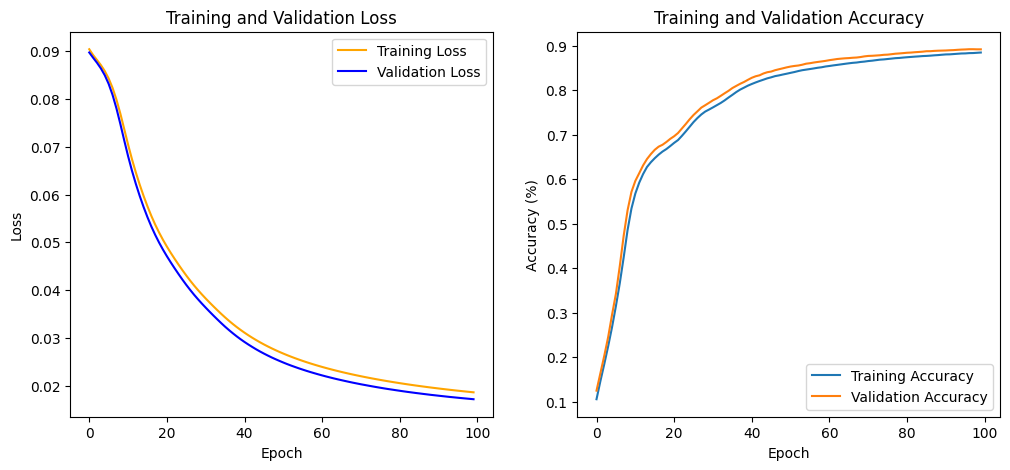

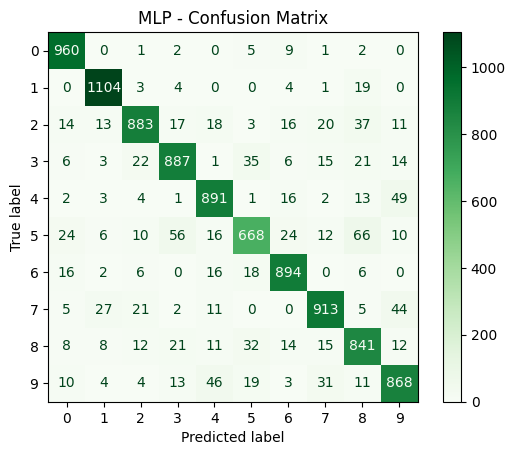

In [10]:
# Plot training loss, accuracy and confussion matrix
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

# Confusion Matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=range(num_classes))
cmd.plot(cmap=plt.cm.Greens)
plt.title(f"MLP - Confusion Matrix")

plt.show()

In [11]:
import session_info
session_info.show(html=False)

-----
keras               3.6.0
matplotlib          3.9.2
numpy               1.26.4
session_info        1.0.0
sklearn             1.5.2
tensorflow          2.17.1
-----
IPython             8.28.0
jupyter_client      8.6.3
jupyter_core        5.7.2
-----
Python 3.12.3 (main, Jan 17 2025, 18:03:48) [GCC 13.3.0]
Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39
-----
Session information updated at 2025-02-03 08:51


# 